In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 64
IMG_HEIGHT = 64

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-convsim-h"

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsK as reports
import keras.models

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000
Noisy files:8886
Nitid files:8886
Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000\validation
Noisy files:2209
Nitid files:2209


In [6]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL)), compile=False)

In [7]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2209
Best RMSENZ  =2049 (0.93)
Best MAENZ   =2046 (0.93)
Best Accuracy=2006 (0.91)
RMSE-NZ  Pred=0.0255  Noisy=0.0942
MAE-NZ   Pred=0.0216  Noisy=0.0903
PSNR     Pred=19.5 dB Noisy=9.3 dB
Accuracy Pred=0.39    Noisy=0.09
SSM      Pred=0.94    Noisy=0.66
HOG MSE  Pred=0.09    Noisy=0.12


In [8]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )
reports.saveScores( DEST_TESTS, SAVED_MODEL, predictions_metrics )

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


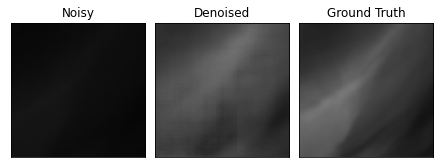

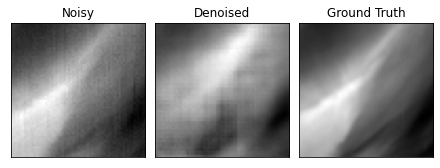

RMSE-NZ  Pred=0.0665  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0599  Noisy=0.1954 BEST
PSNR     Pred=17.0 dB Noisy=6.9 dB BEST
Accuracy Pred=0.04    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.35
HOG MSE  Pred=0.07    Noisy=0.13
******************************************************
Index:1
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


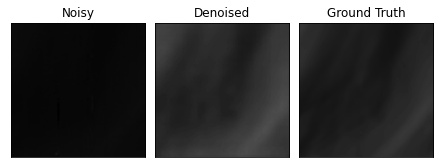

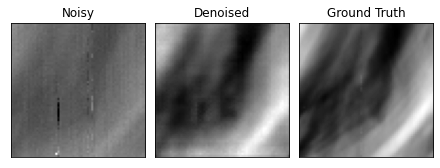

RMSE-NZ  Pred=0.0588  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0558  Noisy=0.0953 BEST
PSNR     Pred=11.5 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.16
******************************************************
Index:2
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


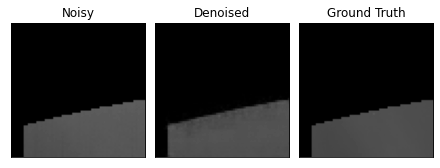

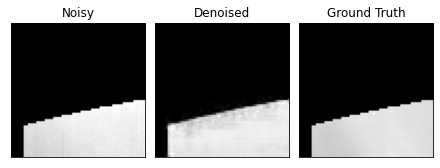

RMSE-NZ  Pred=0.0163  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0079  Noisy=0.0376 BEST
PSNR     Pred=26.5 dB Noisy=19.0 dB BEST
Accuracy Pred=0.75    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.95
HOG MSE  Pred=0.20    Noisy=0.07
******************************************************
Index:3
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


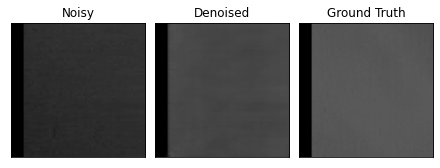

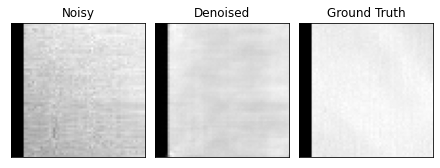

RMSE-NZ  Pred=0.0652  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0613  Noisy=0.1622 BEST
PSNR     Pred=14.9 dB Noisy=6.9 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.87
HOG MSE  Pred=0.01    Noisy=0.01
******************************************************
Index:4
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


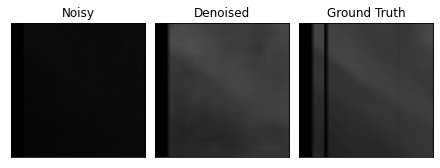

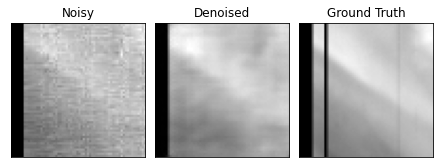

RMSE-NZ  Pred=0.0343  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0177  Noisy=0.1661 BEST
PSNR     Pred=18.5 dB Noisy=4.6 dB BEST
Accuracy Pred=0.41    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.31
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:5
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


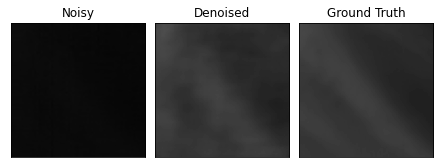

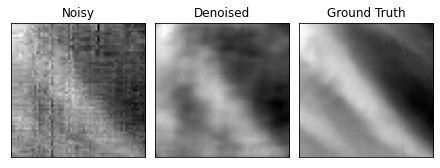

RMSE-NZ  Pred=0.0119  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0094  Noisy=0.1619 BEST
PSNR     Pred=27.4 dB Noisy=4.6 dB BEST
Accuracy Pred=0.60    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.33
HOG MSE  Pred=0.14    Noisy=0.35
******************************************************
Index:6
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


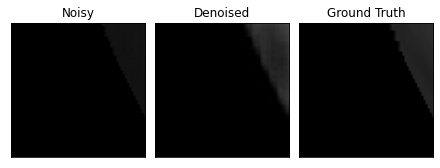

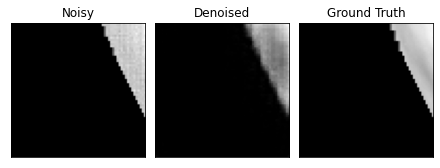

RMSE-NZ  Pred=0.0159  Noisy=0.0366 BEST
MAE-NZ   Pred=0.0055  Noisy=0.0184 BEST
PSNR     Pred=21.3 dB Noisy=14.0 dB BEST
Accuracy Pred=0.88    Noisy=0.74 BEST
SSM      Pred=0.96    Noisy=0.90
HOG MSE  Pred=0.33    Noisy=0.02
******************************************************
Index:7
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


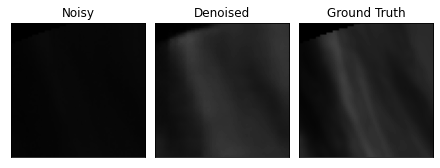

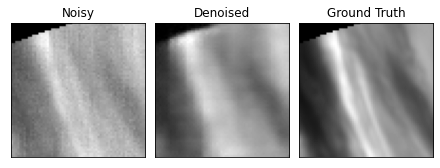

RMSE-NZ  Pred=0.0219  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0183  Noisy=0.0979 BEST
PSNR     Pred=21.3 dB Noisy=7.3 dB BEST
Accuracy Pred=0.26    Noisy=0.01 BEST
SSM      Pred=0.91    Noisy=0.35
HOG MSE  Pred=0.04    Noisy=0.13
******************************************************
Index:8
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


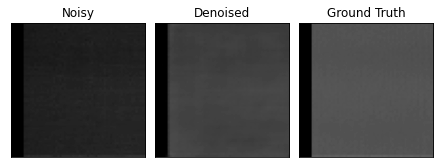

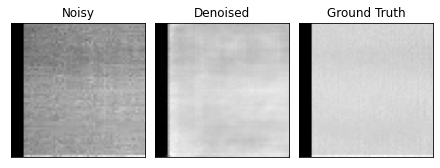

RMSE-NZ  Pred=0.0686  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0646  Noisy=0.1947 BEST
PSNR     Pred=15.1 dB Noisy=6.0 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.75
HOG MSE  Pred=0.01    Noisy=0.02
******************************************************
Index:9
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


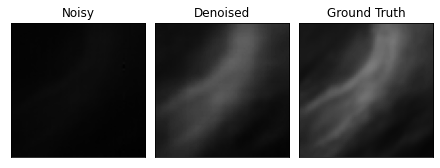

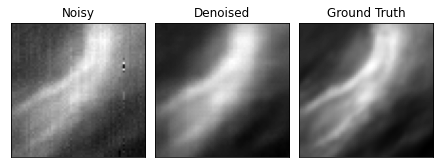

RMSE-NZ  Pred=0.0438  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0379  Noisy=0.1660 BEST
PSNR     Pred=20.8 dB Noisy=8.0 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.34
HOG MSE  Pred=0.03    Noisy=0.09
******************************************************
Index:10
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


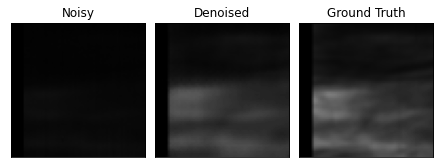

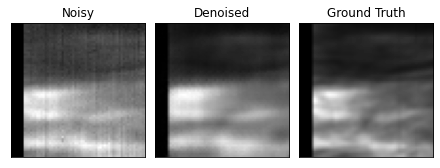

RMSE-NZ  Pred=0.0409  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0300  Noisy=0.1438 BEST
PSNR     Pred=21.7 dB Noisy=9.1 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.43
HOG MSE  Pred=0.01    Noisy=0.05
******************************************************
Index:11
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


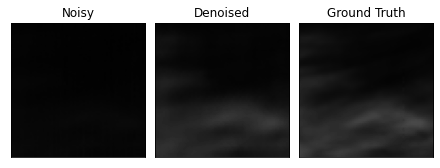

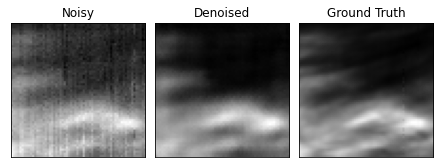

RMSE-NZ  Pred=0.0217  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0169  Noisy=0.0772 BEST
PSNR     Pred=22.5 dB Noisy=9.4 dB BEST
Accuracy Pred=0.40    Noisy=0.04 BEST
SSM      Pred=0.94    Noisy=0.55
HOG MSE  Pred=0.03    Noisy=0.12
******************************************************
Index:12
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


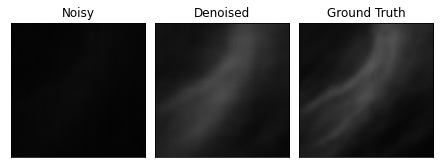

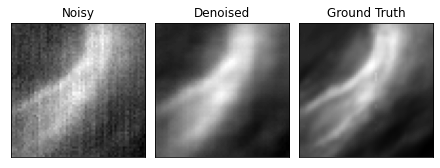

RMSE-NZ  Pred=0.0197  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0160  Noisy=0.1019 BEST
PSNR     Pred=24.6 dB Noisy=8.8 dB BEST
Accuracy Pred=0.36    Noisy=0.02 BEST
SSM      Pred=0.94    Noisy=0.36
HOG MSE  Pred=0.03    Noisy=0.14
******************************************************
Index:13
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


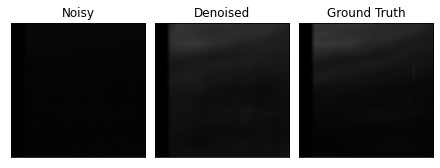

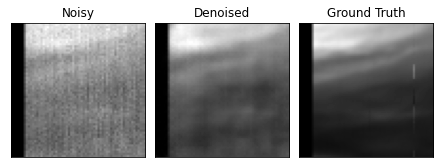

RMSE-NZ  Pred=0.0214  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0182  Noisy=0.0512 BEST
PSNR     Pred=20.4 dB Noisy=10.0 dB BEST
Accuracy Pred=0.27    Noisy=0.21 BEST
SSM      Pred=0.87    Noisy=0.45
HOG MSE  Pred=0.08    Noisy=0.10
******************************************************
Index:14
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


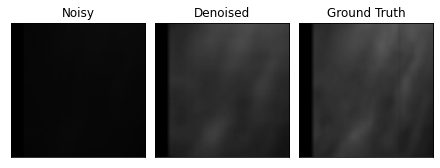

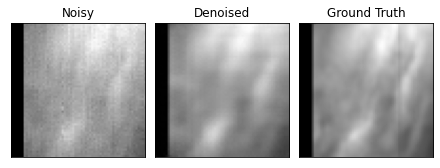

RMSE-NZ  Pred=0.0284  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0256  Noisy=0.1780 BEST
PSNR     Pred=21.7 dB Noisy=5.5 dB BEST
Accuracy Pred=0.13    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.30
HOG MSE  Pred=0.02    Noisy=0.03
******************************************************


In [9]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )

Index:2
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000\validation\VI0112_00_02_12_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000\validation\VI0112_00_02_12_nitid_idx134.tif


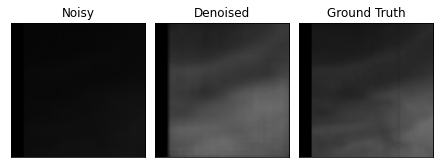

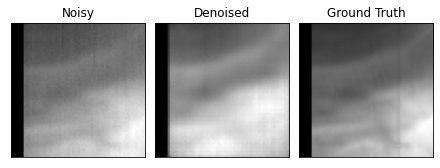

RMSE-NZ  Pred=0.0699  Noisy=0.1722 BEST
MAE-NZ   Pred=0.0626  Noisy=0.1588 BEST
PSNR     Pred=15.5 dB Noisy=7.7 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.29
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************


In [10]:
test_indexes = np.array([2])
reports.predictByIndexes( model, val_noisy, val_nitid, val_noisy_files, val_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD, \
                        save_pred = True, save_folder_name = DEST_TESTS )